In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

Using TensorFlow backend.


In [2]:
labels = ['hack','not_hack']

In [132]:
seed = 44

In [4]:
df_train = pd.read_csv('Scaled_train_data.csv')

In [5]:
df_train.shape

(23856, 18)

In [6]:
df_train.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MONTH,YEAR,MULTIPLE_OFFENSE
0,-0.336018,0.735474,0.618599,-0.773174,-0.741487,-0.258103,0.289416,0.018952,0.789559,-0.21871,-0.354223,0.022125,0.245047,-1.008707,0.302290,0.149115,-0.031958,0
1,0.358553,0.801090,0.816814,-1.452367,-1.250886,1.083651,3.123057,0.018952,0.789559,-0.21871,0.312205,0.022125,0.643638,1.601155,0.063821,0.149115,1.635738,1
2,-0.336018,-1.429847,-1.495693,-0.433578,1.296112,-1.152606,-1.256207,0.707115,-1.412075,-0.21871,-0.354223,0.022125,0.897286,0.469445,0.063821,-1.065287,1.635738,1
3,-0.336018,0.538627,0.486456,-0.773174,-0.741487,0.189148,-0.998603,0.018952,0.789559,-0.21871,0.451940,0.022125,-0.479664,-1.008707,0.063821,-1.368887,0.609464,1
4,-0.336018,0.538627,0.486456,-0.773174,-0.741487,0.412774,-0.483396,-0.669211,0.055681,-0.21871,-0.354223,-0.837524,0.969758,-1.008707,1.136931,-0.761686,0.096326,1


In [7]:
hack = df_train[df_train['MULTIPLE_OFFENSE']==0]
not_hack = df_train[df_train['MULTIPLE_OFFENSE']==1]

In [235]:
hack.shape

(1068, 18)

In [236]:
not_hack.shape

(22788, 18)

In [12]:

# data = df_train.drop(['DATE','INCIDENT_ID'], axis=1)
data = df_train

In [13]:
data.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MONTH,YEAR,MULTIPLE_OFFENSE
0,-0.336018,0.735474,0.618599,-0.773174,-0.741487,-0.258103,0.289416,0.018952,0.789559,-0.21871,-0.354223,0.022125,0.245047,-1.008707,0.302290,0.149115,-0.031958,0
1,0.358553,0.801090,0.816814,-1.452367,-1.250886,1.083651,3.123057,0.018952,0.789559,-0.21871,0.312205,0.022125,0.643638,1.601155,0.063821,0.149115,1.635738,1
2,-0.336018,-1.429847,-1.495693,-0.433578,1.296112,-1.152606,-1.256207,0.707115,-1.412075,-0.21871,-0.354223,0.022125,0.897286,0.469445,0.063821,-1.065287,1.635738,1
3,-0.336018,0.538627,0.486456,-0.773174,-0.741487,0.189148,-0.998603,0.018952,0.789559,-0.21871,0.451940,0.022125,-0.479664,-1.008707,0.063821,-1.368887,0.609464,1
4,-0.336018,0.538627,0.486456,-0.773174,-0.741487,0.412774,-0.483396,-0.669211,0.055681,-0.21871,-0.354223,-0.837524,0.969758,-1.008707,1.136931,-0.761686,0.096326,1


In [237]:
X_train, X_test = train_test_split(data, test_size=0.10, random_state=seed)
X_train = X_train[X_train.MULTIPLE_OFFENSE == 1]
X_train = X_train.drop(['MULTIPLE_OFFENSE'], axis=1)
y_test = X_test['MULTIPLE_OFFENSE']
X_test = X_test.drop(['MULTIPLE_OFFENSE'], axis=1)
X_train = X_train.values
X_test = X_test.values
X_train.shape

(20510, 17)

In [238]:
len(X_test)

2386

In [239]:
y_test.value_counts()

1    2278
0     108
Name: MULTIPLE_OFFENSE, dtype: int64

## using 2 layer autoencoder 

In [337]:
input_dim = X_train.shape[1]
encoding_dim = 16
input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh")(input_layer)    #activity_regularizer=regularizers.l1(10e-5)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='relu')(encoder)
decoder = Dense(encoding_dim , activation='tanh')(decoder)
decoder = Dense(input_dim )(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [338]:
autoencoder.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 17)                0         
_________________________________________________________________
dense_69 (Dense)             (None, 16)                288       
_________________________________________________________________
dense_70 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_71 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_72 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_73 (Dense)             (None, 17)                289       
Total params: 929
Trainable params: 929
Non-trainable params: 0
____________________________________________________________

In [339]:
nb_epoch = 20
batch_size = 64
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="scaled_features/model_2_layer_encoder_try2.pt",
                               verbose=0,
                               save_best_only=True)

In [340]:
history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer]).history

Train on 20510 samples, validate on 2386 samples
Epoch 1/20
20510/20510 [==============================] - 0s 21us/step - loss: 0.7828 - accuracy: 0.2294 - val_loss: 0.5735 - val_accuracy: 0.3101
Epoch 2/20
20510/20510 [==============================] - 0s 17us/step - loss: 0.5586 - accuracy: 0.3735 - val_loss: 0.4567 - val_accuracy: 0.4074
Epoch 3/20
20510/20510 [==============================] - 0s 16us/step - loss: 0.4715 - accuracy: 0.4266 - val_loss: 0.4035 - val_accuracy: 0.4107
Epoch 4/20
20510/20510 [==============================] - 0s 16us/step - loss: 0.4407 - accuracy: 0.4185 - val_loss: 0.3808 - val_accuracy: 0.4137
Epoch 5/20
20510/20510 [==============================] - 0s 17us/step - loss: 0.4222 - accuracy: 0.4207 - val_loss: 0.3644 - val_accuracy: 0.4237
Epoch 6/20
20510/20510 [==============================] - 0s 16us/step - loss: 0.4100 - accuracy: 0.4284 - val_loss: 0.3553 - val_accuracy: 0.4246
Epoch 7/20
20510/20510 [==============================] - 0s 16us/ste

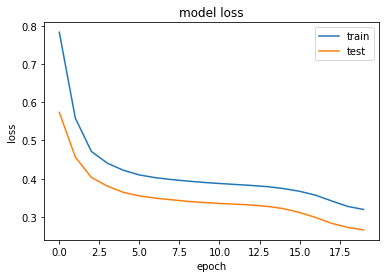

In [341]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [342]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

,reconstruction_error,true_class
count,2386.000000,2386.000000
mean,0.266333,0.954736
std,1.019749,0.207926
min,0.006726,0.000000
25%,0.122223,1.000000
50%,0.194637,1.000000
75%,0.291995,1.000000
max,48.502078,1.000000


## Reconstruction error without Fraud

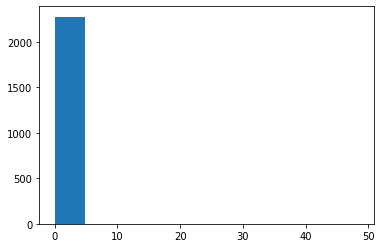

In [343]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 1) ]   #& (error_df['reconstruction_error'] < 10)
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

## Reconstruction error with Fraud

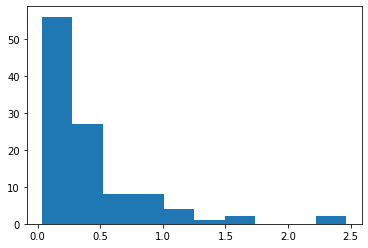

In [344]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 0]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

In [345]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

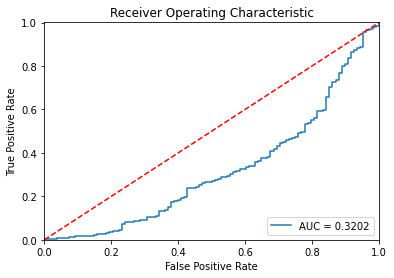

In [346]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

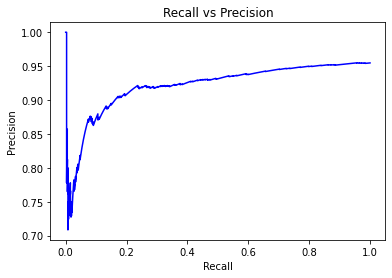

In [347]:
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

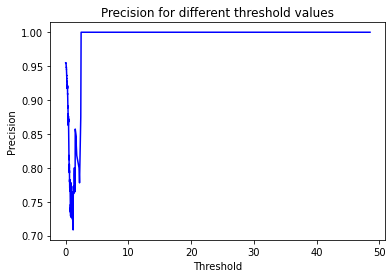

In [348]:
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

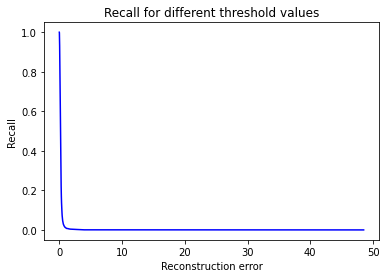

In [349]:
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.show()

In [350]:
error_df.head()

,reconstruction_error,true_class
8972,0.113510,1
22053,0.323269,1
12560,0.539411,0
808,1.202941,0
11193,0.364603,0


In [351]:
error_df[error_df['true_class']==1]['reconstruction_error'].mean()

0.25880259992234417

In [352]:
error_df[error_df['true_class']==0]['reconstruction_error'].mean()

0.4251630834012248

In [353]:
threshold = error_df[error_df['true_class']==1]['reconstruction_error'].mean()


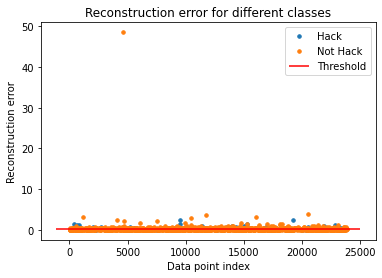

In [354]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Hack" if name == 0 else "Not Hack")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

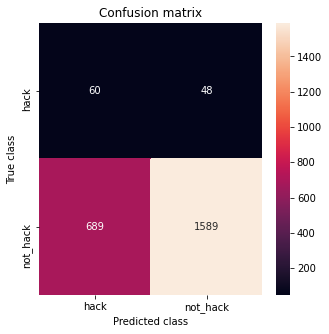

In [355]:
y_pred = [0 if e > threshold else 1 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, xticklabels=labels, yticklabels= labels, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


In [356]:
from sklearn.metrics import recall_score

In [357]:
recall_score(error_df.true_class, y_pred,pos_label=0)

0.5555555555555556

In [120]:
test_data = pd.read_csv('Scaled_test_data.csv')

In [121]:
test_data.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MONTH,YEAR
0,-0.331481,0.346538,0.689141,0.912994,0.280910,-0.019072,-0.223789,-0.670665,0.066372,-0.286542,-0.353935,0.031543,-0.479795,1.076964,-1.253581,-1.385653,1.775280
1,-0.331481,1.265846,1.284086,-1.104095,0.280910,0.205591,-1.002090,2.048068,0.793816,-0.286542,1.171179,-1.113717,-2.662153,-0.994943,0.069444,-1.081162,-0.024625
2,-0.331481,0.609197,0.556931,-0.431732,1.299566,-0.917722,0.554512,1.368384,-3.570845,-0.286542,1.171179,0.031543,-0.479795,-1.662558,0.069444,-1.690145,1.775280
3,4.625633,-1.426414,-1.492323,-0.431732,1.299566,0.654917,0.813946,-0.670665,0.066372,-0.286542,-0.353935,0.031543,0.975111,0.340286,0.069444,0.441295,0.232504
4,-0.331481,-1.163754,-1.095693,0.912994,0.280910,-0.917722,0.554512,0.009018,0.066372,-0.286542,-0.353935,-1.113717,0.975111,0.478413,1.151918,1.050278,0.875328


In [283]:
test_arr = np.array(test_data)

In [284]:
type(test_arr[0])

numpy.ndarray

In [358]:
test_predictions = autoencoder.predict(test_arr)

In [359]:
test_predictions

array([[-0.26801646,  0.5962701 ,  0.6260781 , ..., -1.6177721 ,
         0.24265283,  1.1935229 ],
       [-0.6433994 ,  1.07236   ,  1.0445852 , ...,  0.20562534,
        -0.21360372, -0.36020118],
       [-0.340967  ,  0.51452243,  0.5411737 , ..., -0.1294406 ,
         0.10409895,  1.4535992 ],
       ...,
       [-0.39407313,  0.49212274,  0.48902878, ...,  0.3948791 ,
         0.25688145, -0.00162897],
       [-0.23589736,  0.00744966,  0.00709847, ...,  0.10678701,
        -0.06528273,  0.5659579 ],
       [-0.46180743, -1.3815331 , -1.3673348 , ..., -0.01851989,
        -0.3398743 , -1.4159591 ]], dtype=float32)

In [360]:
mse_test = np.mean(np.power(test_arr - test_predictions, 2), axis=1)

In [361]:
mse_test

array([0.27809322, 0.56322594, 1.14832109, ..., 0.36113852, 0.24740377,
       0.35812895])

In [362]:
test_pred = [0 if e > threshold else 1 for e in mse_test]

In [363]:
test_pred

[0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,


In [364]:
k = pd.Series(test_pred,name='MULTIPLE_OFFENSE')

In [365]:
k.to_csv('Prediction_folder/pred_55_percent_recall.csv',index=False)